## **দুটো ফিচার নিয়ে আইরিশ ডেটাসেটকে প্লট করি**

সরল রেখায় ডিসিশন সারফেস/বাউন্ডারি বানানো যায় সহজে। কোড কমানোর জন্য 'plot_decision_regions' নামের একটা হেলপার ফাংশন ব্যবহার করি।

Link: https://rakibul-hassan.gitbook.io/deep-learning/start-page/feature_crosses

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


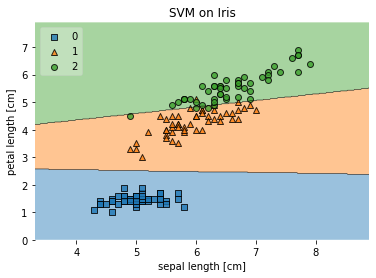

In [4]:
from sklearn import datasets
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline

# taking two features
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# training classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)

# plotting with new liberary
plot_decision_regions(X, y, clf=svm, legend=2)

# setting labels
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

## একটা নন-লিনিয়ারিটির উদাহরণ দেখি আসল ডেটা থেকে

In [5]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split

## ভার্সন চেক করি

In [6]:
sklearn.__version__

'0.22.2.post1'

In [15]:
try:
  # %tensorflow_version only exists in Colab.
  # শুধুমাত্র জুপিটার নোটবুক/কোলাবে চেষ্টা করবো টেন্সর-ফ্লো ২.০ এর জন্য
  %tensorflow_version 2.x
except Exception:
  pass  

## ১. ডেটাকে আমরা লোড করে সেটাকে ট্রেইন এবং টেস্টসেটে ভাগ করি 

In [20]:
# df = pd.read_csv('geoloc_elev.csv)
df = pd.read_csv('https://raw.githubusercontent.com/raqueeb/TensorFlow2/master/datasets/geoloc_elev.csv')

# taking two features
X = df[['lat', 'lon']].values
y = df['target'].values

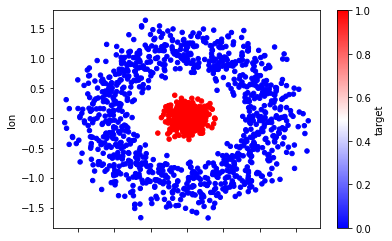

In [23]:
df.plot(kind='scatter',
        x='lat',
        y='lon',
        c='target',
        cmap='bwr');

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


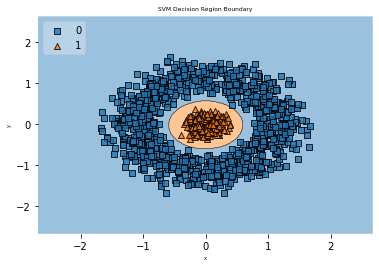

In [27]:
# now use support vector machine
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# using plotting liberary, plot_decision_regions
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('SVM Decision Region Boundary', size=6)
plt.show()

## ট্রেনিং/টেস্ট স্প্লিট করা 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## একটা লজিস্টিক রিগ্রেশন করি

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## একটা প্লটিং দেখি

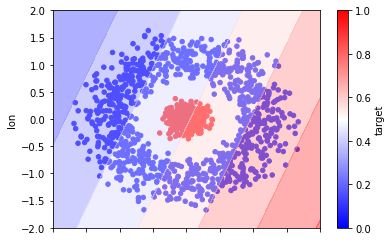

In [32]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = lr.predict_proba(ab)[:,1]
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

## ২. একদম বেসিক নিউরাল নেটওয়ার্কে দেখি
১টা ইনপুট লেয়ার, ১টা নিউরন, ১টা আউটপুট।

In [34]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(tf.keras.optimizers.SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
result = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
30/30 [==============================] - 1s 10ms/step - loss: 0.6966 - accuracy: 0.4477 - val_loss: 0.6118 - val_accuracy: 0.6381
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 0.5893 - accuracy: 0.6762 - val_loss: 0.5852 - val_accuracy: 0.6381
Epoch 3/20
30/30 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.5763 - val_loss: 0.5832 - val_accuracy: 0.6381
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.5551 - accuracy: 0.6464 - val_loss: 0.5627 - val_accuracy: 0.6381
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.6568 - val_loss: 0.5508 - val_accuracy: 0.6381
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.5551 - accuracy: 0.6087 - val_loss: 0.5461 - val_accuracy: 0.6381
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 0.5369 - accuracy: 0.6221 - val_loss: 0.5420 - val_accuracy: 0.6381
Epoch 8/20
30/30 [

## অ্যাক্যুরেসি প্লটিং দেখি

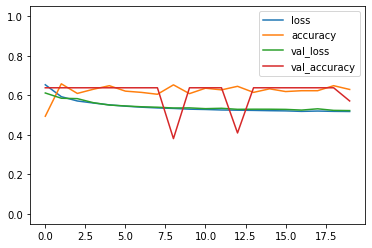

In [36]:
pd.DataFrame(result.history).plot(ylim=(-0.05, 1.05))

## ডিসিশন বাউন্ডারি কি ঠিক হলো?

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


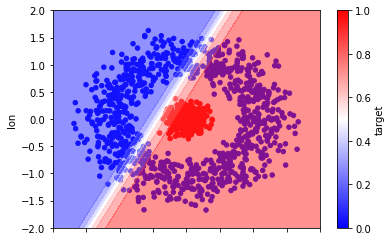

In [39]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

# c = model.predict_proba(ab)[:,1]
c = model.predict_proba(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim=2, activation='tanh'),
    # এই লেয়ার পরে যোগ করে আমরা দেখবো 
    # tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(tf.keras.optimizers.SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
h = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
30/30 [==============================] - 1s 7ms/step - loss: 0.6572 - accuracy: 0.6248 - val_loss: 0.6526 - val_accuracy: 0.6381
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.6423 - val_loss: 0.6163 - val_accuracy: 0.6381
Epoch 3/20
30/30 [==============================] - 0s 3ms/step - loss: 0.5727 - accuracy: 0.6776 - val_loss: 0.5251 - val_accuracy: 0.6286
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7559 - val_loss: 0.4069 - val_accuracy: 0.9429
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.3726 - accuracy: 0.9595 - val_loss: 0.2846 - val_accuracy: 0.9905
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 0.2544 - accuracy: 0.9865 - val_loss: 0.1975 - val_accuracy: 1.0000
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 0.1802 - accuracy: 0.9989 - val_loss: 0.1429 - val_accuracy: 1.0000
Epoch 8/20
30/30 [==

## একটা কনফিউশন ম্যাট্রিক্স তৈরি করি

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict_classes(X_test)

cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
             index=["Miss", "Hit"],
             columns=['pred_Miss', 'pred_Hit'])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,pred_Miss,pred_Hit
Miss,311,0
Hit,0,139


In [57]:
train_score = model.evaluate(X_train, y_train, verbose=0)[1]
test_score = model.evaluate(X_test, y_test, verbose=0)[1]

print("""Accuracy scores:
        Train:\t{:0.3}
        Test:\t{:0.3}""".format(train_score, test_score))

Accuracy scores:
        Train:	1.0
        Test:	1.0


## নতুন ডিসিশন বাউন্ডারি, অল্প লেয়ারেই

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


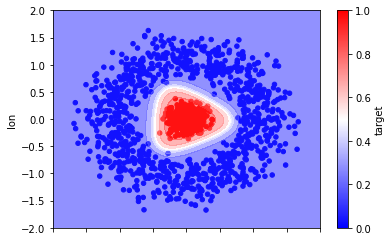

In [58]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict_proba(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)